<a href="https://colab.research.google.com/github/ErickMM98/NetworkAnalysis_TwitterTrends/blob/main/NetworkAnalysis_TwitterTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Grafica series de tiempo**

In [ ]:
pip install https://github.com/thibaudmartinez/node2vec/releases/download/v0.1.0/node2vec-0.1.0-cp37-cp37m-linux_x86_64.whl

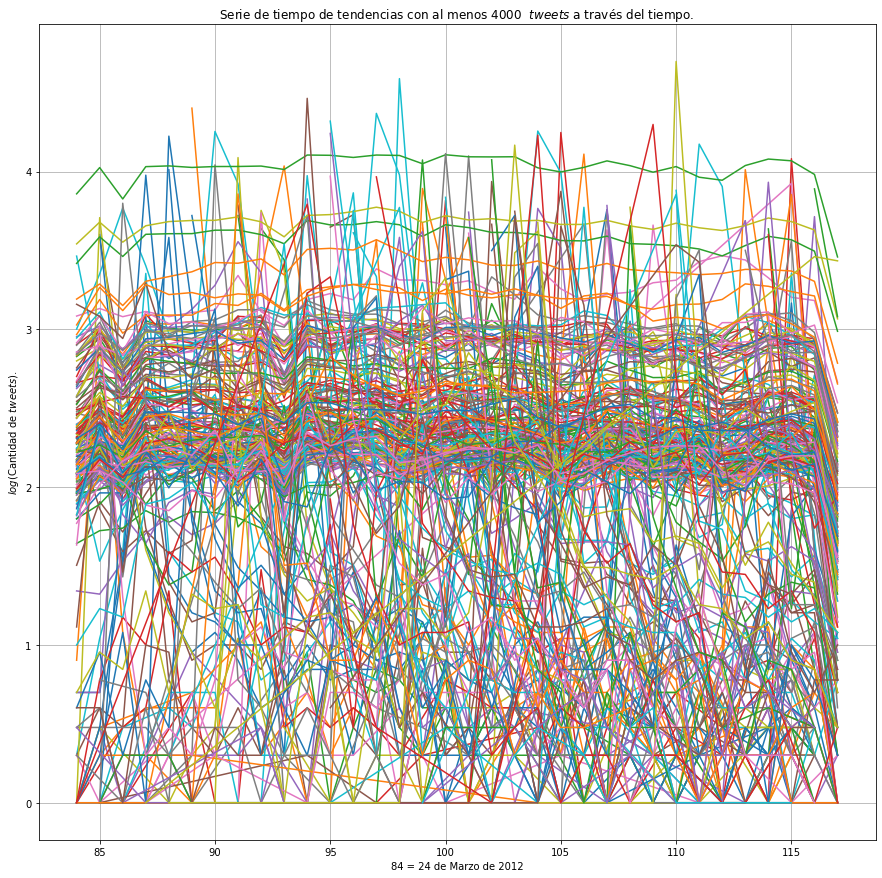

In [ ]:
###### Data
 
yolodf = None
fig = plt.figure(figsize = (15,15))
for name_h in name_all_hastag:
  #wihtelist = ['wheniwaslittle', 'oomf','yolo','10factsaboutme','sorrynotsorry']
  wihtelist = ['oomf',
               'np',
               'nf',
               'ff',
               'teamfollowback',
               'bahrain',
               'rt',
               'thoughtsduringschool',
               'yolo',
               'dearoomf']
  #wihtelist = ['youvedoneittoo',
  #             'iwonderif',
  #             'weed',
  #             'truestory '
  #             'immadbecause',
  #             'butyouathug',
  #             'stfu',
  #             'bored',
  #             'ifweweretogetherrightnow',
  #             'icantlivewithout',
  #             'thatdepressingmoment']
  #wihtelist = ['yolo']
  #wihtelist = ['bored']
 
  #if name_h in wihtelist:
  if True:
    prueba = name_all_hastag[name_h]
    #del prueba[0]
    prueba = [ k.split(',') for k in prueba ]
    df_final = pd.DataFrame(prueba, columns = ['time','userid'])
    #path_final_csv = '/content/gen_csv/{}.csv'.format(name_h)
    #df_final.to_csv(path_or_buf=path_final_csv)
    df_final['time'] = pd.to_datetime(df_final['time'],unit='s')
 
    df_final['day'] = df_final['time'].apply(giveday)
    days = df_final.groupby('day')
    daycount = days['day'].count()
    timedict = daycount.to_dict()
 
    plt.plot(list(timedict.keys()),  np.log10(list(timedict.values())),
             label = "#{}; n = {}".format(name_h,
                                          np.sum(list(timedict.values()))))
    #plt.xticks(list(timedict.keys()), fontsize=15, rotation=90)
    #yolodf = df_final
 
plt.title("Serie de tiempo de tendencias con al menos 4000  $tweets$ a través del tiempo.")
plt.ylabel("$log$(Cantidad de $tweets$).")
plt.xlabel("84 = 24 de Marzo de 2012")
#plt.legend()
plt.grid()
#plt.show()
plt.savefig(fname = "/content/images/ts_tweets_allforall.pdf")

# **Visualización de una tendencia**

In [ ]:
G_auxiliar = None
 
def get_plots_trend(name_trend):
  """
  Function to make a beauty presentation
  """
  ##### DATA SET
 
  xlabel_time = []
  entropy_time = []
  betweenes_time = []
 
  #### SERIE DE TIEMPO
 
  yolodf = None
  fig = plt.figure(figsize = (20,20))
 
  for name_h in name_all_hastag:
    if name_h == name_trend:
      prueba = name_all_hastag[name_h]
      prueba = [ k.split(',') for k in prueba ]
      df_final = pd.DataFrame(prueba, columns = ['time','userid'])
      df_final['time'] = pd.to_datetime(df_final['time'],unit='s')
 
      df_final['day'] = df_final['time'].apply(giveday)
      days = df_final.groupby('day')
      daycount = days['day'].count()
      timedict = daycount.to_dict()
      plt.subplot(221)
      plt.plot(list(timedict.keys()), list(timedict.values()),
              label = "#{}; n = {}".format(name_h,
                                            np.sum(list(timedict.values()))),
               color = "red")
      yolodf = df_final
 
  plt.title("Serie de tiempo de $tweets$ de #{}".format(name_trend))
  plt.ylabel("Cantidad de $tweets$.")
  plt.xlabel("84 = 24 de Marzo de 2012")
  plt.grid()
 
 
 
  #### ESTUDIO POR DIAS
  data_follow = get_data_followers_and_friends()


  user_study = np.unique(yolodf['userid'])
  days_study = np.unique(yolodf['day'])
  all_links_social_study = data_follow[data_follow['source'].isin(user_study)]
  for day in days_study:
    tweets_for_day = yolodf[yolodf['day'] == day]
    edge_links_day = data_follow[data_follow['source'].isin(tweets_for_day['userid'])]
    #Por hora
    tweets_for_day['hour'] = tweets_for_day['time'].apply(givehour)
    hours = tweets_for_day.groupby('hour')
    entropy_by_days = []
    betweenes_by_days = []
    for hour in np.unique(tweets_for_day['hour']):
      tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
      ## 50 tweets
      n_tweets = tweets_for_hour.shape[0]
      if n_tweets > 50:
        tweets_for_hour.sample(n=50, random_state=1)
      edge_links_hour = edge_links_day[edge_links_day['source'].isin(tweets_for_hour['userid'])]
 
      #MAKE A GRAPH
      G_follow = nx.Graph()
      nx.from_pandas_edgelist(df = edge_links_hour,
                          source = 'source',
                          target = 'target',
                          create_using=G_follow)
      
      kj = min([int(G_follow.number_of_nodes() / 4),100])
      
      #RETURN DATETIME
      #oficial_time =  pd.Timedelta(day, unit = 'day') + pd.Timedelta(hour, unit = 'h')
 
      #oficial_time =  day + hour/24
 
      #Some metrics
      g_entropy = entropy_of_graph(G_follow)
      g_betweenes = 0
      try:
        g_betweenes = np.nanmean(list( nx.betweenness_centrality(G_follow, k=kj).values() ) )
      except:
        print("Hay un error aquí.")
        g_betweenes = 0
        G_auxiliar = G_follow
 
      #Add data
      #xlabel_time.append(oficial_time)
      entropy_by_days.append(g_entropy)
      betweenes_by_days.append(g_betweenes)
    xlabel_time.append(day)
    entropy_time.append(np.median(entropy_by_days))
    betweenes_time.append(np.nanmean(betweenes_by_days))
 
 
 
  #### ENTROPÍA 
  plt.subplot(222)
  plt.title("Entropía de #{} a través del tiempo".format(name_trend))
  plt.xlabel('84 = 24 de Marzo de 2012')
  plt.ylabel('Entropía')
  plt.grid()
  plt.plot(xlabel_time,entropy_time)
 
  #### BETWEENES 
 
  plt.subplot(223)
  plt.title("$Betweenes$ de #{} a través del tiempo".format(name_trend))
  plt.xlabel('84 = 24 de Marzo de 2012')
  plt.ylabel('Centralidad')
  plt.grid()
  plt.plot(xlabel_time,betweenes_time)
 
  
  ###Distribución de grado 
  G = nx.Graph()
  #social_data = data_follow[data_follow['source'].isin(yolodf['userid'])]
  nx.from_pandas_edgelist(df = all_links_social_study,
                          source = 'source',
                          target = 'target',
                          create_using=G)
  plt.subplot(224)
  plt.title("Distribución de grado")
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
  degreeCount = collections.Counter(degree_sequence)
  deg, cnt = zip(*degreeCount.items())
  plt.bar(np.log10(deg), np.log10(cnt), width=0.4, color="gray")
  plt.xlabel(r'$log(k)$')
  plt.ylabel('$log(P_k)$')
  #plt.ylim([0,100])
 
  #plt.savefig(fname = "/content/images/info_trend_{}.pdf".format(name_trend))
 
 
 
##### MAIN
 
get_plots_trend("bored")

NameError: ignored

<Figure size 1440x1440 with 0 Axes>

## Función auxiliar para comprimir carpetas

In [ ]:
!zip -r /content/respaldo_gephi.zip /content/data_comunity/

updating: content/data_comunity/ (stored 0%)
updating: content/data_comunity/ret_thehairoscope.gexf (deflated 83%)
updating: content/data_comunity/men_thehairoscope.gexf (deflated 70%)
updating: content/data_comunity/twi_thehairoscope.gexf (deflated 85%)
updating: content/data_comunity/men_wewontworkoutif.gexf (deflated 79%)
updating: content/data_comunity/men_teamautofollow.gexf (deflated 67%)
updating: content/data_comunity/ret_teamautofollow.gexf (deflated 48%)
updating: content/data_comunity/twi_wewontworkoutif.gexf (deflated 85%)
updating: content/data_comunity/ret_wewontworkoutif.gexf (deflated 81%)
updating: content/data_comunity/twi_teamautofollow.gexf (deflated 85%)
  adding: content/data_comunity/twi_10peopleontwitteriwanttomeet.gexf (deflated 86%)
  adding: content/data_comunity/ret_10peopleontwitteriwanttomeet.gexf (deflated 81%)
  adding: content/data_comunity/men_10peopleontwitteriwanttomeet.gexf (deflated 82%)


In [ ]:
ntweets = 000
all_tweets = None
name_all_hastag00 = {}
with open(path_tweets_users, 'r') as reader:
  namehashatag = None
  for line in reader:
    list_tweets = line.split()
    namehashatag = list_tweets[0]
    count_tw = len(list_tweets) - 1
    if True:
      name_all_hastag00[namehashatag] = count_tw
 
print(len(name_all_hastag00.keys()))
print(np.sum(list(name_all_hastag00.values())))

# Nueva organización. Por capas


# **Funciones básicas**

In [3]:
import tarfile
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import datetime as dt
import collections
import itertools
import random
import seaborn as sn
import threading
 
#GENERAL VALUES (secret values to public)
 
main_seed = 123456789
 
path_main_drive = "/content/drive/My Drive/NetworkAnalysis_TwitterTrends/virality2013.tar.gz"
path_friends_followers = "/content/follower_gcc.anony.dat"
path_tweets_users = "/content/timeline_tag.anony.dat"
path_retweets_users = "/content/timeline_tag_rt.anony.dat"
path_mentions_users = "/content/timeline_tag_men.anony.dat"
 
def extract_file_from_drive():
  """
  Function to extract all the data files.
  Just for the first time. 
  """
  my_tar = tarfile.open(path_main_drive)
  my_tar.extractall('//content')
  my_tar.close()  
 
def get_data_followers_and_friends():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.
 
  return @Dataframe 
  """
  data = pd.read_csv(path_friends_followers,
                     sep=' ',
                     #nrows = 10000000,
                     names=['source', 'target'])
  return data
 
def get_data_tweets_time():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.
 
  return @Dataframe 
  """
  data = pd.read_csv(path_tweets_users,
                     sep=' ',
                     nrows = 100)
                     #names=['source', 'target'])
  return data
 
 
def get_data_retweets_time():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.
 
  return @Dataframe 
  """
  pass
 
def get_data_mentions_time():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.
 
  return @Dataframe 
  """
  pass
 
def givehour(timestamp):
    day_string = timestamp.hour
    return day_string
 
def giveday(timestamp):
    day_string = timestamp.dayofyear
    return day_string
 
"""
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
------------------------ Plot beauty networks ---------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
"""
 
 
def plot_social_network():
  """
  Function to plot fancy social network
  """

### **Extracción de datos** 

In [4]:
"""
FUNCIONES PARA LEER LA INFORMACIÓN
"""
K_number_tweets = 4000
#K_number_tweets = 0
"""
OBTENER LA INFOR COMO DICCIONARIOS.
"""
 
def get_dic_tweets():
  """
  TWEETS
  Función para leer la info en un diccionario
  """
  name_all_hastag = {}
  with open(path_tweets_users, 'r') as reader:
    for line in reader:
      list_tweets = line.split()
      namehashatag = list_tweets.pop(0)
      count_tw = len(list_tweets)
      if count_tw >  K_number_tweets:
        name_all_hastag[namehashatag] = list_tweets
  return name_all_hastag
 
def get_dic_retweets():
  """
  RETWEETS
  Función para leer la info en un diccionario
  """
  name_all_hastag = {}
  with open(path_retweets_users, 'r') as reader:
    for line in reader:
      list_tweets = line.split()
      namehashatag = list_tweets.pop(0)
      name_all_hastag[namehashatag] = list_tweets
  return name_all_hastag
 
def get_dic_mentions():
  """
  MENCIONES
  Función para leer la info en un diccionario
  """
  name_all_hastag = {}
  with open(path_mentions_users, 'r') as reader:
    for line in reader:
      list_tweets = line.split()
      namehashatag = list_tweets.pop(0)
      name_all_hastag[namehashatag] = list_tweets
  return name_all_hastag
 
extract_file_from_drive()
 
#Toda la info
dic_tweets_user = get_dic_tweets()
dic_retweets_user = get_dic_retweets()
dic_mentions_user = get_dic_mentions()
 
 
#Vamos a tomar las tendencias que coincidan.
set_trend_tweets = set(dic_tweets_user.keys())
set_trend_retweets = set(dic_retweets_user.keys())
set_trend_menntions = set(dic_mentions_user.keys())
 
#Variables generales
list_trends = list(set_trend_menntions & set_trend_retweets & set_trend_tweets )
df_mutual_follow = get_data_followers_and_friends()

In [ ]:
def make_graphs_last_model(trend,count_i,count_j):
  #GENERAMOS LOS DATAFRAMES
 
  #TWEETS
  df_rel_tweets = pd.DataFrame([ k.split(',') for k in dic_tweets_user[trend]]
                   , columns = ['time','userid'])
  df_rel_tweets['time'] = pd.to_datetime(df_rel_tweets['time'],unit='s')
 
  df_rel_tweets['day'] = df_rel_tweets['time'].apply(giveday)
  df_rel_tweets['hour'] = df_rel_tweets['time'].apply(givehour)
 
  """
  days = df_rel_tweets.groupby('day')
  daycount = days['day'].count()
  timedict = daycount.to_dict()
  
  plt.plot(list(timedict.keys()), list(timedict.values()),
          label = "#{}; n = {}".format(trend,
                                        np.sum(list(timedict.values()))),
            color = "red")
  plt.legend()
  plt.show()
  """
  
  #RETWEETS
  df_rel_retweets = pd.DataFrame([ k.split(',') for k in dic_retweets_user[trend]]
                   , columns = ['time','target','source'])
  df_rel_retweets['time'] = pd.to_datetime(df_rel_retweets['time'],unit='s')
 
  df_rel_retweets['day'] = df_rel_retweets['time'].apply(giveday)
  df_rel_retweets['hour'] = df_rel_retweets['time'].apply(givehour)
 
  #MENTIONS
  df_rel_mentions = pd.DataFrame([ k.split(',') for k in dic_mentions_user[trend]]
                   , columns = ['time','source','target'])
  df_rel_mentions['time'] = pd.to_datetime(df_rel_mentions['time'],unit='s')
 
  df_rel_mentions['day'] = df_rel_mentions['time'].apply(giveday)
  df_rel_mentions['hour'] = df_rel_mentions['time'].apply(givehour)
 
  
  #VAMOS A SACAR LOS DÍAS Y HORAS DE OPERACIÓN
  set_days_to_tweets = set(pd.unique(df_rel_tweets['day']).tolist())
  set_days_to_retweets = set(pd.unique(df_rel_retweets['day']).tolist())
  set_days_to_mentions = set(pd.unique(df_rel_mentions['day']).tolist())
  study_days = list( set_days_to_tweets | set_days_to_retweets | set_days_to_mentions)
  
 
  sum_p =0 
  final_df = []
  for day in study_days:
    for hour in range(0,24):
      sub_list = list()
      make_noise ="{} / {} --- {} ----------------> DAY {} - HOUR {} ".format(count_i,
                                                                              count_j,
                                                                              trend,
                                                                              day,
                                                                              hour) 
      print(make_noise)
      #-----------------------------PARA TWEETS
      tweets_for_day = df_rel_tweets[df_rel_tweets['day'] == day]
      tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
      best_sample = pd.unique(tweets_for_hour['userid'])
      edge_tweets_for_hour = df_mutual_follow[df_mutual_follow['source'].isin(best_sample)]
 
      nsize = Ntwets = edge_tweets_for_hour.shape[0]
      f_limit = 10000
      #
      #if nsize > f_limit:
      #  edge_tweets_for_hour = edge_tweets_for_hour.sample(n = f_limit,
      #                                                     random_state = np.random.RandomState(main_seed))
      #Por hora
 
      
 
      G_tweets = nx.Graph()
      nx.from_pandas_edgelist(df = edge_tweets_for_hour,
                          source = 'source',
                          target = 'target',
                          create_using=G_tweets)
 
      #A LO MÁS 10,000 NODOS
 
      if len(G_tweets) > f_limit:
        sample = np.random.choice(np.array(list(G_tweets.nodes)),size=2500)
        G_tweets = G_tweets.subgraph(sample)
 
      kj = min([int(G_tweets.number_of_nodes() / 4),100])
 
      #METRICS
      Ntwets = tweets_for_hour.shape[0]
      STweets = entropy_of_graph(G_tweets)
      
      g_betweenes = 0
      try:
        g_betweenes = np.nanmean(list( nx.betweenness_centrality(G_tweets, k=kj).values() ) )
        if pd.isnull(g_betweenes):
          g_betweenes = 0
      except:
        g_betweenes = 0
      

      
      g_clustering = get_clustering_grapg(G_tweets)

      mean_k = mean_degree(G_tweets)
      mean_L = mean_shortest_path(G_tweets)
 
 
 
      #------------------------------PARA RETWEETS
      retweets_for_day = df_rel_retweets[df_rel_retweets['day'] == day]
      edges_retweets_for_hour = retweets_for_day[retweets_for_day['hour'] == hour]
 
      G_retweets = nx.DiGraph()
      nx.from_pandas_edgelist(df = edges_retweets_for_hour,
                          source = 'source',
                          target = 'target',
                          create_using=G_retweets)
 
 
      #METRICS
      Nretwets = edges_retweets_for_hour.shape[0]
 
      diam_retweets = mean_diameter(G_retweets)
      vecin_retweets = get_vecindad_mas_grande(G_retweets)
 
 
 
      
 
      #------------------------------PARA MENTIONS
      mentions_for_day = df_rel_mentions[df_rel_mentions['day'] == day]
      edges_mentions_for_hour = mentions_for_day[mentions_for_day['hour'] == hour]
 
      G_mentions = nx.DiGraph()
      nx.from_pandas_edgelist(df = edges_mentions_for_hour,
                          source = 'source',
                          target = 'target',
                          create_using=G_mentions)
 
      #METRICS
      Nmentions = edges_mentions_for_hour.shape[0]
 
      diam_mentions = mean_diameter(G_mentions)
      vecin_mentions = get_vecindad_mas_grande(G_mentions)
 
 
      """
      ADD DATA
      """
      sub_list.append(day)
      sub_list.append(hour)
      sub_list.append(Ntwets)
      sub_list.append(Nretwets)
      sub_list.append(Nmentions)
 
      sub_list.append(mean_k)
      sub_list.append(mean_L)
 
      sub_list.append(g_clustering)
      sub_list.append(g_betweenes)
      sub_list.append(STweets)
 
      sub_list.append(diam_retweets)
      sub_list.append(vecin_retweets)
 
      sub_list.append(diam_mentions)
      sub_list.append(vecin_mentions)
 
      final_df.append(sub_list)
 
      columns = ["day",
                 "hour",
                 "ntweets",
                 "nretweets",
                 "nmentions",
                 "k",
                 "L",
                 "clustering",
                 "betweenness",
                 "entropy",
                 "diam_rt",
                 "v_rt",
                 "diam_ment",
                 "v_ment"]
  return pd.DataFrame(data=final_df, columns= columns)
#A = make_graphs_last_model(trend)

## **Métricas**


In [1]:
def count_tweets(G):
  pruebadata = list( list(k[2].values()) for k in list(G.edges(data = True)))
  pruebadata = [ extract_numeric_sum_data(edge_list) for edge_list in pruebadata]
 
  degree_sequence = sorted(pruebadata, reverse=True)
  N = np.sum(degreeCount)
  return N
 
def extract_numeric_sum_data(somelist):
  sum_final = 0
  for i in somelist:
    try:
      int(i)
      sum_final += int(i)
    except:
      continue
  return sum_final

def strong_edge(G):
  G_degree = dict(G.degree())
  final_list = []
  for edge in G.edges:
    s = edge[0]
    t = edge[1]
    k_s = G_degree[s]
    k_t = G_degree[t]
    n_cneig = len(list(nx.common_neighbors(G, s, t)))
    if n_cneig == 0:
      final_list.append(0)
    else:
      final_list.append(n_cneig / (k_s - 1 + k_t - 1 - n_cneig ))
  return np.mean(final_list)
 
def edge_entropy_of_graph(G):
  pruebadata = list( list(k[2].values()) for k in list(G.edges(data = True)))
  pruebadata = [ extract_numeric_sum_data(edge_list) for edge_list in pruebadata]
 
  degree_sequence = sorted(pruebadata, reverse=True)
  degreeCount = list(dict(collections.Counter(degree_sequence)).values())
  N = np.sum(degreeCount)
  vectorprobs = 1/N * np.array(degreeCount)
  entropy =  np.sum(vectorprobs * np.log2(1/vectorprobs))
  return entropy
 
def edge_strong_of_graph_compose(G):
  #STRONG EDGE
  edges_final_strong = []
  for edge_aux in g_compose_nd.edges():
    source = edge_aux[0]
    target = edge_aux[1]
    #Cantidad de vecinos en común
    n_ij = len(list(nx.common_neighbors(g_compose_nd, source, target)))
    k_s = g_compose_nd.degree(source)
    k_t = g_compose_nd.degree(target)
    o_ij = 0
    try:
      o_ij = n_ij / ( ( k_s - 1) + (k_t - 1) - n_ij) 
    except:
      o_ij = 0
    edges_final_strong.append(o_ij)
  return np.mean(edges_final_strong)
 
def entropy_of_graph(G):
  """
  Function to get the entropy of a graph
 
  Con pesos 1
  G : @nx.Graph A graph non directed
 
  return @float The entropy of the graph G
  """
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
  N = G.number_of_nodes()
  if N == 0:
    return 0
  degreeCount = list(dict(collections.Counter(degree_sequence)).values())
  vectorprobs = 1/N * np.array(degreeCount)
  entropy =  np.sum(vectorprobs * np.log2(1/vectorprobs))
  return entropy
 
def get_vecindad_mas_grande(G):
  try:
    degree_sequence = [d for n, d in G.degree()]
    if len(degree_sequence) == 0:
      return 0
    else:
      return np.max( degree_sequence)
  except:
    return 0
 
def mean_degree(G):
  try:
    degree_sequence = [d for n, d in G.degree()]
    if len(degree_sequence) == 0:
      return 0
    else:
      return np.mean( degree_sequence)
  except:
    return 0
 
def mean_shortest_path(G):
  try:
    largest_cc = list(max(nx.connected_components(G), key=len))
    Gc = G.subgraph(largest_cc).copy()
    return nx.average_shortest_path_length(Gc)
  except:
    return 0
 
def mean_diameter(G):
  try:
    largest_cc = list(max(nx.algorithms.components.weakly_connected_components(G), key=len))
    if len(largest_cc) == 0:
      return 0
    else:
      G_aux = G.subgraph(largest_cc).copy().to_undirected()
      ex = nx.algorithms.distance_measures.diameter(G_aux)
      return ex
  except:
      return 0
 
def get_timeserie_three_grpahs(G1):
  "Dada una gráfica, obten su serie de tiempo"
  try:
    timeserie = list(itertools.chain.from_iterable(list( edge[2]['tTweets'] for edge in list(G.edges(data = True)))))
  except:
    pass
  try:
    timeserie = list(itertools.chain.from_iterable(list( edge[2]['tReTweets'] for edge in list(G.edges(data = True)))))
  except:
    pass
  try:
    timeserie = list(itertools.chain.from_iterable(list( edge[2]['tMenTweets'] for edge in list(G.edges(data = True)))))
  except:
    pass
  return timeserie
 
def get_rel_clustering_by_time(G1):
  pass
 
def get_diameter(G1):
  try:
    try:
      if not nx.is_connected(G1):
        ndirigida = nx.algorithms.components.connected_components(G1)
        max = 0
        set_final = None
        for k in ndirigida:
          if len(k) > max:
            max = len(k)
            set_final = list(k)
        G1 = G1.subgraph(set_final)
        return nx.algorithms.distance_measures.diameter(G1)
      else:
        return nx.algorithms.distance_measures.diameter(G1)
    except:
      G1 = G1.to_undirected()
      if not nx.is_connected(G1):
        ndirigida = nx.algorithms.components.connected_components(G1)
        max = 0
        set_final = None
        for k in ndirigida:
          if len(k) > max:
            max = len(k)
            set_final = list(k)
        G1 = G1.subgraph(set_final)
        return nx.algorithms.distance_measures.diameter(G1)
      else:
        return nx.algorithms.distance_measures.diameter(G1)
  except:
    return 0
 
def get_clustering_grapg(G1):
  try:
    return nx.algorithms.cluster.average_clustering(G1)
  except:
    return 0

In [4]:
from os import listdir
from os.path import isfile, join
import logging
 
list_foo = []
def fun_foo(trend,i,j):
  print(trend,i,j)
  list_foo.append(trend)
 
listfilenametrend = [f.split(".")[0] for f in listdir('/content/drive/MyDrive/TestFolder/datafortime')]
restan_trends = list(set(list_trends) - set(listfilenametrend))
 
final_dict_df = {}
 
 
def aux_function(trend,i,j):
  df = make_graphs_last_model(trend,i,j)
  path = '/content/drive/MyDrive/TestFolder/datafortime'
  other_path = '/content/datasave'
  final_path = '{}/{}.csv'.format(path,trend)
  other_final_path = '{}/{}.csv'.format(other_path,trend)
  try:
    df.to_csv(final_path,index=False)
    df.to_csv(other_final_path,index=False)
    final_dict_df[trend] = df
  except:
    final_dict_df[trend] = df
  print("YA ACABE ---------------------------------- {}".format(trend))
  
 
 
 
N = len(restan_trends)
i = 1
 
print(N)
 
list_thread = list()
"""
for k  in range(len(restan_trends)):
  trend = restan_trends[k]
  t1 = threading.Thread(target=aux_function, args=(trend, i,N))
  list_thread.append(t1)
  i +=1
  t1.start()
 
for index, thread in enumerate(list_thread):
  logging.info("MAIN     before joining thread {}".format(index))
  thread.join()
  logging.info("MAIN     thread  {}".format(index))
"""
 
"""
for trend in list_trends:
  print("******** ESTO HACIENDO ------------------------- {} ------------------------------------ ******".format(trend))
  dict_df_trends_infotime[trend] = make_graphs_last_model(trend,count_i=i,count_j=N)
  i+=1
  path = '/content/drive/MyDrive/TestFolder/datafortime'
  final_path = '{}/{}.csv'.format(path,trend)
  df = dict_df_trends_infotime[trend]
  df.to_csv(final_path,index=False)
"""

KeyboardInterrupt: ignored

In [ ]:
from os import listdir
from os.path import isfile, join
#listfilenametrend = [f.split(".")[0] for f in listdir('/content/drive/MyDrive/TestFolder/datafortime')]
#restan_trends = list(set(list_trends) - set(listfilenametrend))


restan_trends = ['ff']

N = len(restan_trends)
i = 1

for k  in range(len(restan_trends)):
  trend = restan_trends[k]
  #aux_function(trend, i,N)



restan_trends# Hay colas pesadas 

In [ ]:
import seaborn as sn


trend = list_trends[0]
list_final = []
for trend in list_trends:
  n_tweets = len(dic_tweets_user[trend])
  n_mentions = len(dic_mentions_user[trend])
  n_retweets = len(dic_retweets_user[trend])
  list_final.append([trend,n_tweets,n_mentions,n_retweets])

df = pd.DataFrame(data = list_final, columns=["trend","$log(N Tweets)$","$log(N Mentions)$","$log(N Retweets)$"])
df = df[["$log(N Tweets)$","$log(N Mentions)$","$log(N Retweets)$"]]
df = np.log10(df)

plt.figure(figsize = (20,20))
covMatrix = df.corr()
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

#df = df.sort_values("n_tweets",ascending=False)
plt.figure(figsize = (20,20))
sn.pairplot(df, corner=True,
            plot_kws=dict(marker="+", linewidth=1),
            diag_kws=dict(fill=False))
plt.show()

In [ ]:
trend = list_trends[10]
#trend = "np"


from scipy.stats import powerlaw

#kappa = powerlaw.fit(data)
#gamma = 1 + kappa[0]
for trend in list_trends:
    
    list_ts_tweets = dic_tweets_user[trend]
    list_ts_mentions = dic_mentions_user[trend]
    list_ts_retweets = dic_retweets_user[trend]
    
    array_ts_tweets = np.array([int(str_data.split(',')[0]) for str_data in list_ts_tweets])
    array_ts_retweets = np.array([int(str_data.split(',')[0]) for str_data in list_ts_retweets])
    array_ts_mentions = np.array([int(str_data.split(',')[0]) for str_data in list_ts_mentions])

    intertime_tweets = np.diff(array_ts_tweets)

    kappa = powerlaw.fit(intertime_tweets)
    gamma = 1 + kappa[0]

    print(trend,gamma)
intertime_tweets = np.diff(array_ts_tweets)
intertime_retweets = np.diff(array_ts_retweets)
intertime_mentions = np.diff(array_ts_mentions)
 
plt.subplot(131)
plt.hist(intertime_tweets, bins = 50 )
 
plt.subplot(132)
plt.hist(intertime_retweets, bins = 50 )
 
plt.subplot(133)
plt.hist(intertime_mentions , bins = 50 )

In [ ]:
import pybursts

#print(np.unique(array_ts_tweets) - min(np.unique(array_ts_tweets)) )
pybursts.pybursts.kleinberg(np.unique(array_ts_tweets) - min(np.unique(array_ts_tweets)))

In [ ]:
from scipy.stats import powerlaw

a = powerlaw.fit(intertime_tweets)
print(a[0])
print(a[1])
print(a[2])
x = np.linspace(0.0001,10,10000)
#plt.plot(x, x**(-a[0] ) )
plt.hist(intertime_tweets, bins = 100 )

rv = powerlaw(a[0])
plt.plot(x, rv.pdf(x), 'k-', lw=2)
plt.show()

## Restaurar info

Cerca de terminar temprano :

In [ ]:
import zipfile
import gzip
import shutil
from os import listdir
from os.path import isfile, join


def extract_edges_from_content():
  """
  Function to extract all the data files.
  Just for the first time. 
  """
  with zipfile.ZipFile('/content/respaldo_edges.zip', 'r') as zip_ref:
    zip_ref.extractall('//content')



def extract_gz_from_drive(path_from,path_to):
  """
  Function to extract all the data files.
  Just for the first time. 
  """
  with gzip.open(path_from, 'rb') as f_in:
    with open(path_to, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

def restorage_main_data_edges():
  extract_edges_from_content()
  listfilenametrend = [f for f in listdir('/content/content/FINAL_GRAPHS')]
  final_dic = {}
  for trend in listfilenametrend:
    if not trend == 'HOLA' and not trend == '.ipynb_checkpoints':
      #Extraer

      dic_trend = {}

      tweet_root_path = '/content/content/FINAL_GRAPHS/{}/Tweet.gz'.format(str(trend))
      retweet_root_path = '/content/content/FINAL_GRAPHS/{}/Retweet.gz'.format(str(trend))
      mention_root_path = '/content/content/FINAL_GRAPHS/{}/Mention.gz'.format(str(trend))

      tweet_root_path_to = '/content/content/FINAL_GRAPHS/{}/Tweet.txt'.format(str(trend))
      retweet_root_path_to = '/content/content/FINAL_GRAPHS/{}/Retweet.txt'.format(str(trend))
      mention_root_path_to = '/content/content/FINAL_GRAPHS/{}/Mention.txt'.format(str(trend))

      extract_gz_from_drive(tweet_root_path,tweet_root_path_to)
      extract_gz_from_drive(retweet_root_path,retweet_root_path_to)
      extract_gz_from_drive(mention_root_path,mention_root_path_to)

      fh = open(tweet_root_path_to, "rb")
      G_tweet = nx.read_edgelist(fh, data=True)
      fh.close()
      dic_trend['Tweet'] = G_tweet
      

      fh = open(retweet_root_path_to, "rb")
      G_retweet = nx.read_edgelist(fh, data=True)
      fh.close()
      dic_trend['Retweet'] = G_retweet
      

      fh = open(mention_root_path_to, "rb")
      G_mention = nx.read_edgelist(fh, data=True)
      fh.close()
      dic_trend['Mention'] = G_mention
      

      final_dic[trend] = dic_trend 
  return final_dic

  

dic_graphs_trends = restorage_main_data_edges()

FileNotFoundError: ignored

## Funciones creadoras de grafos

In [ ]:
#TODAS LAS FUNCIONES RECIBEN UNA TENDENCIA

p = 0.5
max_friends = 15

def create_graph_tweets(trend):
  #Dada una tendencia, dame su grafica asociada
  #Tanto las aristas como los nodos tienen su propiedades
  G = nx.Graph()
  #Lista 
  list_tweets = dic_tweets_user[trend]
  #Sacamos el sample 
  list_length = len(list_tweets)
  list_length = random.sample(list_tweets, k= int(list_length * p))
  user_has_tweet = []
  for tweet in list_tweets:
    tweet = [aux_t for aux_t in tweet.split(',')]
    time = str(tweet[0])
    user = str(tweet[1])
    #Aqui lo agregamos con los parámetros


    #sleep(10)
    if user in user_has_tweet:
      #AQUI YA ESTÁ
      try:
        edges_u = G.edges(user)
        for u_target in edges_u:
          u_target = u_target[1]
          G[user][u_target]['cTweets'] += 1
          G[user][u_target]['tTweets'].append(time)
          try:
            G.nodes[user]['firstTime'] = min(G.nodes[user]['firstTime'],time)
          except:
            attrs = {user: {"firstTime": time}}
            nx.set_node_attributes(G, attrs)
      except:
        continue
    else:
      user_has_tweet.append(user)
      # "El nodo NO existe"
      followers = df_mutual_follow[df_mutual_follow['source'] == int(user)]
      n_tweets = followers.shape[0]
      if n_tweets > max_friends:
        followers = followers.sample(n=max_friends, random_state=1)
      followers = followers['target'].tolist()
      for ufollow in followers:
        #Datos de la arista
        G.add_edge(user, str(ufollow), 
                  cTweets = 1, 
                  tTweets = [time])
        #Datos del nodo inicial
        attrs = {user: {"firstTime": time}}
        nx.set_node_attributes(G, attrs)
  return G

def create_digraph_retweets(trend):
  #Dada una tendencia, dame su grafica asociada para los retweets
  #Tanto las aristas como los nodos tienen su propiedades
  G = nx.DiGraph()
  #Lista 
  list_tweets = dic_retweets_user[trend]

  #Sacamos la muestra
  list_length = len(list_tweets)
  list_length = random.sample(list_tweets, k=int(list_length * p))
  for tweet in list_tweets:
    tweet = [aux_t for aux_t in tweet.split(',')]
    time = str(tweet[0])
    user = str(tweet[1])
    from_user = str(tweet[2])

    #Aqui lo agregamos con los parámetros
    if (from_user, user) in list(G.edges):
      G[from_user][user]['cReTweets'] += 1
      G[from_user][user]['tReTweets'].append(time)
      try:
        G.nodes[user]['firstTime'] = min(G.nodes[user]['firstTime'],time)
      except:
        attrs = {user: {"firstTime": time}}
        nx.set_node_attributes(G, attrs)
    else:
      G.add_edge(from_user, user, 
                  cReTweets = 1, 
                  tReTweets = [time])
      #Datos del nodo inicial
      attrs = {user: {"firstTime": time}}
      nx.set_node_attributes(G, attrs)
  return G

def create_digraph_mentions(trend):
  #Dada una tendencia, dame su grafica asociada para los retweets
  #Tanto las aristas como los nodos tienen su propiedades
  G = nx.DiGraph()
  #Lista 
  list_tweets = dic_mentions_user[trend]

  #Sacamos la muestra
  list_length = len(list_tweets)
  list_length = random.sample(list_tweets, k=int(list_length * p))

  for tweet in list_tweets:
    tweet = [aux_t for aux_t in tweet.split(',')]
    time = str(tweet[0])
    from_user = str(tweet[1])
    user = str(tweet[2])

    #Aqui lo agregamos con los parámetros
    if (from_user, user) in list(G.edges):
      G[from_user][user]['cMenTweets'] += 1
      G[from_user][user]['tMenTweets'].append(time)
      try:
        G.nodes[from_user]['firstTime'] = min(G.nodes[user]['firstTime'],time)
      except:
        attrs = {from_user: {"firstTime": time}}
        nx.set_node_attributes(G, attrs)
    else:
      G.add_edge(from_user, user, 
                  cMenTweets = 1, 
                  tMenTweets = [time])
      #Datos del nodo inicial
      attrs = {user: {"firstTime": time}}
      nx.set_node_attributes(G, attrs)
  return G

#G_Tweets = create_graph_tweets(list_trends[0])
#G_ReTweets = create_digraph_retweets(list_trends[0])
#G_Mentions = create_digraph_mentions(list_trends[0])
#print(list(G_Mentions.edges(data = True)))

## Diccionario final de los trends

In [ ]:
#prueba = [list_trends[0]]

prueba = list_trends
#len_prueba = int(len(list_trends) * p)
#prueba = random.sample( list_trends, k = len_prueba)




def get_dic_graphs_by_trend(list_trends_0):
  dic_graphs_trends = {}
  for nametrend in list_trends_0:
    try:
      """
      print("Empiezo --------- >",nametrend)
      G_Tweets = create_graph_tweets(nametrend)
      Gaux = G_Tweets
      print(Gaux.number_of_nodes(), Gaux.number_of_edges())
      print(list(Gaux.edges(data = True))[0:5])
      print("Terminé Tweets")
      """
      G_ReTweets = create_digraph_retweets(nametrend)
      Gaux = G_ReTweets
      print(Gaux.number_of_nodes(), Gaux.number_of_edges())
      print(list(Gaux.edges(data = True))[0:5])
      print("Terminé ReTweets")

      G_Mentions = create_digraph_mentions(nametrend)
      Gaux = G_Mentions
      print(Gaux.number_of_nodes(), Gaux.number_of_edges())
      print(list(Gaux.edges(data = True))[0:5])
      print("Terminé MenTweets")
      dic_by_trend = {'Tweet': G_Tweets,
                  'Retweet': G_ReTweets,
                  'Mention': G_Mentions}
      dic_graphs_trends[nametrend] = dic_by_trend
    except:
      print("Corto ->>>>>>>", nametrend)
      continue
  return dic_graphs_trends

dic_graphs_trends = get_dic_graphs_by_trend(prueba)
#print(dic_graphs_trends)
#print(len(prueba))

In [ ]:

#fig = plt.figure(figsize = (15,15))
#trendname = 'boyfriend'
dataframe_data = []

column = ["Trend",
          "Clustering",
          "D_social",
          "D_retweet",
          "D_mención"]

for trendname in prueba:
  data_stat_trend = [trendname]
  for g in dic_graphs_trends[trendname]:
    G = dic_graphs_trends[trendname][g]
    if g == 'Tweet':
      clustering = get_clustering_grapg(G)
      data_stat_trend.append(clustering)
    D = get_diameter(G)
    data_stat_trend.append(D)
    #nx.readwrite.edgelist.write_edgelist(G,path='/content/test_csv/{}/{}.gz'.format(g),data=True)
    aux = get_timeserie_three_grpahs(G)
    #plt.hist(aux,bins=60,alpha=0.5, label=g, density= True)
  #plt.grid()
  #plt.title("Tendencia #{}".format(trendname))
  #plt.legend()
  #plt.show()
  dataframe_data.append(data_stat_trend)

df = pd.DataFrame(dataframe_data, columns=column)
print(df)

NameError: ignored

In [ ]:
from time import sleep
import os


"""
#GUARDADO DE INFO
for ntrend in dic_graphs_trends:
  dir_path = '/content/FINAL_GRAPHS/{}'.format(ntrend)
  os.mkdir(dir_path)
  for ntgraph in dic_graphs_trends[ntrend]:
    new_path_type = '{}/{}.gz'.format(dir_path, ntgraph)
    G = dic_graphs_trends[ntrend][ntgraph]
    nx.readwrite.edgelist.write_edgelist(G,path= new_path_type,data=True)
"""
def make_table(dic_graphbytrend):
  dataframe_data = []

  column = ["Trend",
          "Betwennes",
          "Clustering",
          "Entropy_edge",
          "Edge_S",
          "ec_social",
          "ec_comp"]
  for ejem_1 in dic_graphbytrend:
    print(ejem_1)
    g_tweet = dic_graphbytrend[ejem_1]['Tweet']
    g_retweet = dic_graphbytrend[ejem_1]['Retweet']
    g_mention = dic_graphbytrend[ejem_1]['Mention']
    g_compose = nx.compose(g_retweet,g_mention)
    g_compose_nd = g_compose.to_undirected()

    #Métricas GLOBALES
    kj = min([int(g_tweet.number_of_nodes() ),10])

    print("betweenes")
    between_dic = nx.betweenness_centrality(g_tweet, k=kj)
    nodemax = max(between_dic, key=between_dic.get)
    betweenes_tweet = np.nanmean( list( between_dic.values() ) )

    print("clus")
    clustering_tweet = get_clustering_grapg(g_tweet)
    print("entropia")
    edge_entropia = edge_entropy_of_graph(g_compose)
    print("edge_strong")
    edge_strongh = edge_strong_of_graph_compose(g_compose_nd)


    print("ec_tweet")
    ec_tweet = nx.edge_connectivity(g_tweet)
    print("ec_comp")
    ec_comp = nx.edge_connectivity(g_compose_nd)
    
    data_stat_trend = [ejem_1,
                       betweenes_tweet,
                       clustering_tweet,
                       edge_entropia,
                       edge_strongh, 
                       ec_tweet,
                       ec_comp]
    dataframe_data.append(data_stat_trend)
  return pd.DataFrame(dataframe_data, columns=column)

df = make_table(dic_graphs_trends)

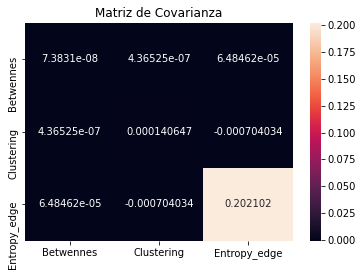

In [ ]:
truedata = df[['Trend',	'Betwennes','Clustering',	'Entropy_edge']]
import seaborn as sn
covMatrix = truedata.cov()

sn.heatmap(covMatrix, annot=True, fmt='g')
plt.title("Matriz de Covarianza")
plt.savefig("/content/matrix_cov.pdf")




# MUCHAS PRUEBAS

In [ ]:
from scipy.optimize import leastsq


def main(x,y):
   # data provided
   # here, create lambda functions for Line, Quadratic fit
   # tpl is a tuple that contains the parameters of the fit
   funcLine=lambda tpl,x : tpl[0] * x**(-tpl[1])
   # func is going to be a placeholder for funcLine,funcQuad or whatever 
   # function we would like to fit
   func=funcLine
   # ErrorFunc is the diference between the func and the y "experimental" data
   ErrorFunc=lambda tpl,x,y: func(tpl,x)-y
   #tplInitial contains the "first guess" of the parameters 
   print(np.mean(y))
   tplInitial1=(1,1)
   # leastsq finds the set of parameters in the tuple tpl that minimizes
   # ErrorFunc=yfit-yExperimental
   tplFinal1,success=leastsq(ErrorFunc,tplInitial1[:],args=(x,y))
   print (" linear fit ",tplFinal1)
   print(success)
   xx1=np.linspace(x.min(),x.max(),50)
   yy1=func(tplFinal1,xx1)
   #------------------------------------------------
   # now the quadratic fit
   #-------------------------------------------------

   plt.plot(xx1,yy1,'r-',x,y,'bo')
   plt.show()

x_sample = np.linspace(0,100,500)
y_sample = 100 * x_sample**(-0.5) + np.random.normal(size=500)





main(x_sample,y_sample)

560.6246311233524


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


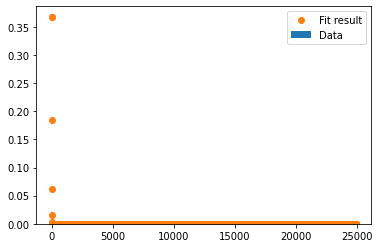

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in power
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in power


(0.21135237197415402, -1.2372896829104594e-21, 40448.59761602568)
-1.2372896829104594e-21
1.211352371974154


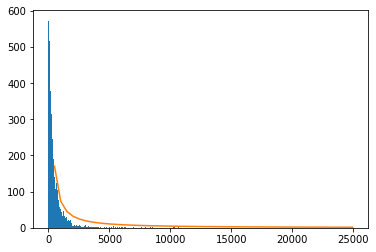

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

# get poisson deviated random numbers
data = intertime_tweets
k = np.mean(data)
print(k)

# the bins should be of integer width, because poisson is an integer distribution

entries, bin_edges, patches = plt.hist(data, density=True, label='Data')

# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(0, max(data))

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    label='Fit result',
)
plt.legend()
plt.show()
x = np.linspace(min(data),max(data))
y = 500*x**(-2)

plt.show()

degree_sequence = sorted(data)
dict_fancy = dict(collections.Counter(degree_sequence))

x_label = list(dict_fancy.keys())
y_label = np.array(list(dict_fancy.values())) / np.sum(list(dict_fancy.values()))


In [ ]:
from os import listdir
from os.path import isfile, join

listfilenametrend = [f.split(".")[0] for f in listdir('/content/drive/MyDrive/TestFolder/datafortime')]
restan_trends = list(set(list_trends) - set(listfilenametrend))
len(restan_trends)

NameError: ignored

# Mini reporte

In [ ]:
from os import listdir
from os.path import isfile, join
listfilenametrend = [f.split(".")[0] for f in listdir('/content/drive/MyDrive/TestFolder/datafortime')]
restan_trends = list(set(list_trends) & set(listfilenametrend))

def get_dict_finaldataframe():
  return_dict = {}
  for trend in restan_trends:
    mini_path = "{}.csv".format(trend)
    thepath = "{}/{}".format('/content/drive/MyDrive/TestFolder/datafortime',mini_path)
    df = pd.read_csv(thepath)
    return_dict[trend] = df
  return return_dict
dict_of_df = get_dict_finaldataframe()

In [ ]:
dict_of_df['wheniwaslittle'].sort_values(by='ntweets',ascending=False).head(30).to_latex(index = False)

'\\begin{tabular}{rrrrrrrrrrrrrr}\n\\toprule\n day &  hour &  ntweets &  nretweets &  nmentions &         k &          L &  clustering &  betweenness &   entropy &  diam\\_rt &  v\\_rt &  diam\\_ment &  v\\_ment \\\\\n\\midrule\n  94 &     5 &     9168 &       1845 &        384 &  0.350844 &  11.569085 &    0.005021 &     0.000011 &  0.993730 &       12 &    75 &          2 &       5 \\\\\n  94 &     6 &     6655 &       1425 &        302 &  0.468180 &  10.380293 &    0.006480 &     0.000016 &  1.175080 &        7 &    43 &          2 &       6 \\\\\n  94 &     4 &     6646 &       1323 &        262 &  0.389641 &  10.926167 &    0.003936 &     0.000005 &  1.049006 &        9 &    77 &          3 &       4 \\\\\n  94 &     3 &     2452 &        528 &         91 &  0.539525 &   8.269113 &    0.002718 &     0.000027 &  1.195304 &        6 &    32 &          3 &      24 \\\\\n  94 &     7 &     2308 &        468 &        116 &  0.697282 &  13.999618 &    0.009423 &     0.000044 &  1.414084

In [ ]:
df_example = list(dict_of_df)
#M = 0
#trend_final = "w"
#for trend in dict_of_df:
#  if np.sum(dict_of_df[trend]['ntweets']) > M:
#    M = np.sum(dict_of_df[trend]['ntweets'])
#    trend_final = trend
#print(trend_final)

df_example = dict_of_df['wheniwaslittle']

df_example = df_example[ df_example['ntweets'] > 0  ].sort_values(by='ntweets',ascending=False)
df_example.head(10).to_latex(index=False)

'\\begin{tabular}{rrrrrrrrrrrrrr}\n\\toprule\n day &  hour &  ntweets &  nretweets &  nmentions &         k &          L &  clustering &  betweenness &   entropy &  diam\\_rt &  v\\_rt &  diam\\_ment &  v\\_ment \\\\\n\\midrule\n  94 &     5 &     9168 &       1845 &        384 &  0.350844 &  11.569085 &    0.005021 &     0.000011 &  0.993730 &       12 &    75 &          2 &       5 \\\\\n  94 &     6 &     6655 &       1425 &        302 &  0.468180 &  10.380293 &    0.006480 &     0.000016 &  1.175080 &        7 &    43 &          2 &       6 \\\\\n  94 &     4 &     6646 &       1323 &        262 &  0.389641 &  10.926167 &    0.003936 &     0.000005 &  1.049006 &        9 &    77 &          3 &       4 \\\\\n  94 &     3 &     2452 &        528 &         91 &  0.539525 &   8.269113 &    0.002718 &     0.000027 &  1.195304 &        6 &    32 &          3 &      24 \\\\\n  94 &     7 &     2308 &        468 &        116 &  0.697282 &  13.999618 &    0.009423 &     0.000044 &  1.414084

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier ins

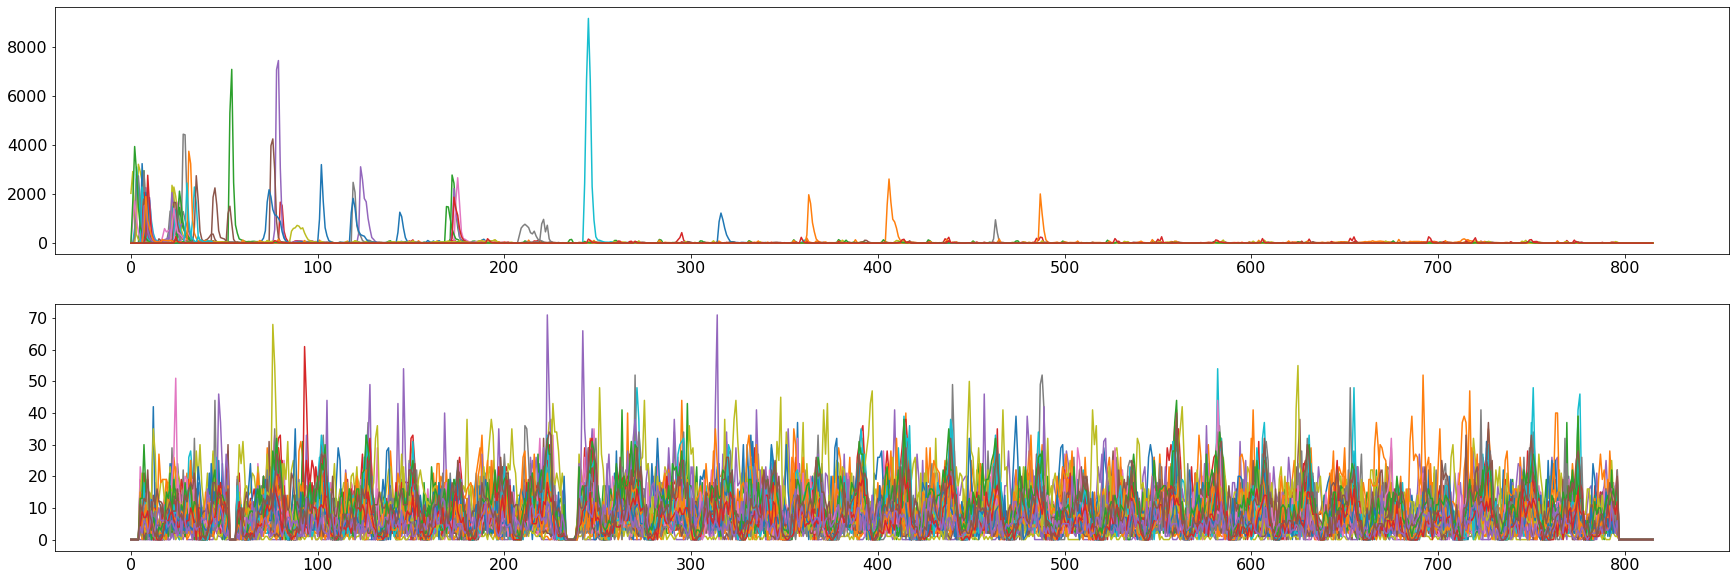

In [ ]:
import scipy.stats as stats
plt.figure(figsize = (30,10))
#print(len(dict_of_df))

dict_of_bursts = {}
for trend in list(dict_of_df.keys()):
  df = dict_of_df[trend]
  ndf = df[df['ntweets'] >  0 ]
  mndf = ndf['ntweets'].shift(1)
  diff_ntweets = ndf['ntweets']/mndf - 1

  dict_of_bursts[trend] = {}
    

  if max(df['ntweets']) > 100:
    ax3 = plt.subplot(211)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax3.plot(df['ntweets'],
            #color ='blue',
            label= trend )
    dict_of_bursts[trend]['burst'] = 1
  else:
    ax4 = plt.subplot(212)
    
    ax4.plot(df['ntweets'],
             #color ='red',
             label= trend )
    dict_of_bursts[trend]['burst'] = 0

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(fname = '/content/datafoo/timeseries.pdf')

In [ ]:
for trend in list(dict_of_df.keys()):
  df_rel_tweets = pd.DataFrame([ k.split(',') for k in dic_tweets_user[trend]]
                   , columns = ['time','userid'])
  G_tweets = nx.Graph()
  best_sample = pd.unique(df_rel_tweets['userid'])
  edge_tweets_for_hour = df_mutual_follow[df_mutual_follow['source'].isin(best_sample)]
  nx.from_pandas_edgelist(df = edge_tweets_for_hour,
                      source = 'source',
                      target = 'target',
                      create_using=G_tweets)
  
  r = nx.algorithms.assortativity.degree_pearson_correlation_coefficient(G_tweets)
  dict_of_bursts[trend]['r'] = r

In [ ]:
master_df = dict_of_df[list(dict_of_df.keys())[0]]

master_df['burst'] = np.repeat(dict_of_bursts[list(dict_of_df.keys())[0]]['burst'],
                               master_df.shape[0])
print(len(list(dict_of_df.keys())[1:]))
for trend in list(dict_of_df.keys())[1:]:
  df_aux = dict_of_df[trend]
  df_aux['burst'] = np.repeat(dict_of_bursts[trend]['burst'],
                               df_aux.shape[0])

  master_df = master_df.append(df_aux,ignore_index=True)

149


              ntweets  nretweets  nmentions  ...  betweenness   entropy     burst
ntweets      1.000000   0.984377   0.563814  ...    -0.036278  0.062254  0.104126
nretweets    0.984377   1.000000   0.539029  ...    -0.033103  0.059277  0.118231
nmentions    0.563814   0.539029   1.000000  ...    -0.033476  0.032526  0.050816
clustering  -0.001571   0.001329   0.000095  ...    -0.030568  0.709558 -0.035869
betweenness -0.036278  -0.033103  -0.033476  ...     1.000000  0.150019  0.187756
entropy      0.062254   0.059277   0.032526  ...     0.150019  1.000000  0.023212
burst        0.104126   0.118231   0.050816  ...     0.187756  0.023212  1.000000

[7 rows x 7 columns]


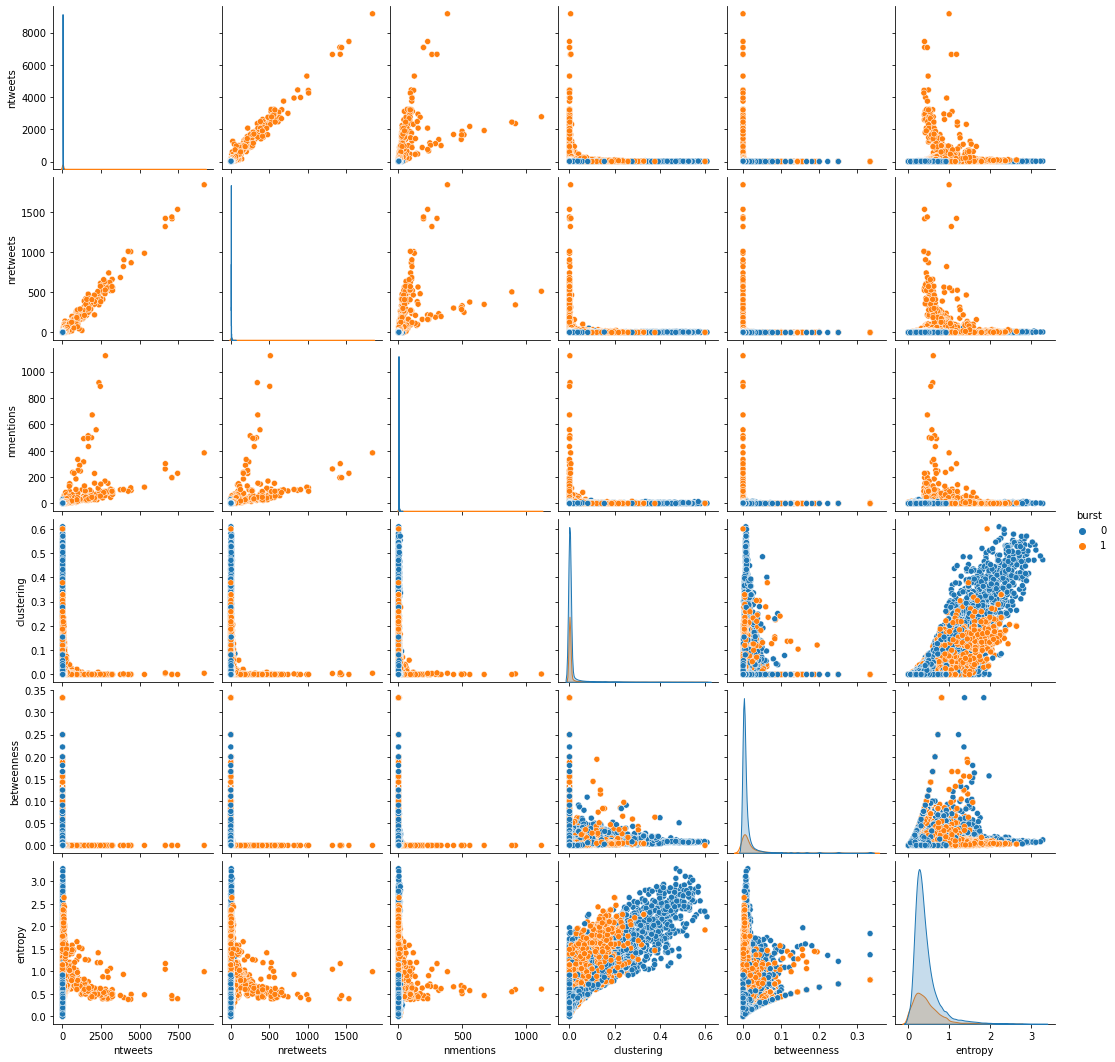

'\nB = A[A.columns.difference([\'day\', \'hour\'])]\ncovMatrix = B.corr()\nprint(covMatrix)\n\nsn.pairplot(B, corner=True,\n            plot_kws=dict(marker="+", linewidth=1),\n            diag_kws=dict(fill=False))\nplt.show()\n\nplt.plot(A[\'ntweets\'])\n'

In [ ]:
B = master_df[['ntweets','nretweets','nmentions','clustering','betweenness','entropy','burst']]
B = B[ B['ntweets'] > 0 ]

covMatrix = B.corr()
print(covMatrix)

sn.pairplot(B,
            hue = 'burst')
plt.show()

"""
B = A[A.columns.difference(['day', 'hour'])]
covMatrix = B.corr()
print(covMatrix)

sn.pairplot(B, corner=True,
            plot_kws=dict(marker="+", linewidth=1),
            diag_kws=dict(fill=False))
plt.show()

plt.plot(A['ntweets'])
"""

In [ ]:
final_list = []

name_columns = ['trend','ntweets', 'nretweets', 'nmentions', 'k', 'L',
       'clustering', 'betweenness', 'entropy', 'diam_rt', 'v_rt', 'diam_ment',
       'v_ment', 'r','burst']

for trend in list(dict_of_df.keys()):
  sub_list = [trend]

  df_aux = dict_of_df[trend]
  #df_aux = df_aux[ df_aux['ntweets'] > 0 ]

  sub_list.append(np.mean(df_aux['ntweets']))
  sub_list.append(np.mean(df_aux['nretweets']))
  sub_list.append(np.mean(df_aux['nmentions']))

  sub_list.append(np.max(df_aux['k']))
  sub_list.append(np.max(df_aux['L']))

  sub_list.append(np.mean(df_aux['clustering']))
  sub_list.append(np.mean(df_aux['betweenness']))
  sub_list.append(np.mean(df_aux['entropy']))

  sub_list.append(np.max(df_aux['diam_rt']))
  sub_list.append(np.max(df_aux['v_rt']))

  sub_list.append(np.max(df_aux['diam_ment']))
  sub_list.append(np.max(df_aux['v_ment']))


  sub_list.append(dict_of_bursts[trend]['r'])
  sub_list.append(dict_of_bursts[trend]['burst'])

  final_list.append(sub_list)

df_foo = pd.DataFrame(data=final_list,columns=name_columns)

### Regresión lineal simple

"\nfrom sklearn import linear_model\nimport statsmodels.api as sm\n\nX = B[['k', 'L',\n       'clustering', 'betweenness', 'entropy',\n        'diam_rt', 'v_rt',\n        'diam_ment', 'v_ment',\n          'r']] \nY = B['burst']\n \n# with sklearn\nregr = linear_model.LinearRegression()\nregr.fit(X, Y)\n\nprint('Intercept: \n', regr.intercept_)\nprint('Coefficients: \n', regr.coef_)\n\nmodel = sm.OLS(Y, X).fit()\npredictions = model.predict(X) \n \nprint_model = model.summary()\nprint(print_model)\n"

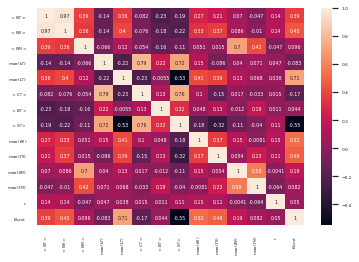

In [ ]:
#df_foo
#print(df_foo.shape[0])

B = B.rename(columns= {'ntweets':'$<N_{T}>$',
          'nretweets':'$<N_{R}>$',
          'nmentions':'$<N_{M}>$',
          'k':'$max(k_{T})$',
          'L':'$max(L_{T})$',
          'clustering':'$<C_{T}>$',
          'betweenness':'$<B_{T}>$',
          'entropy':'$<S_{T}>$',
          'diam_rt':'$max(\delta_{R})$', 
          'v_rt':'$max(\Gamma_{R})$',
          'diam_ment':'$max(\delta_{M})$',
          'v_ment':'$max(\Gamma_{M})$',
          'r':'$r$',
          'burst':'$Burst$'})

covMatrix = B.corr()

sn.heatmap(covMatrix, annot=True)
sn.set(font_scale=0.4)
plt.savefig("/content/datafoo/mcorr.pdf")

"""
from sklearn import linear_model
import statsmodels.api as sm

X = B[['k', 'L',
       'clustering', 'betweenness', 'entropy',
        'diam_rt', 'v_rt',
        'diam_ment', 'v_ment',
          'r']] 
Y = B['burst']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)
"""

In [ ]:
#other_final_path = '/content/datafoo/finaldf.csv'

#B.to_csv(path_or_buf=other_final_path,
#         index=False)


B = pd.read_csv('/content/finaldf.csv')

B.loc[:, B.columns != 'trend'].sort_values(by='entropy', ascending = False).head(50).to_latex()

'\\begin{tabular}{lrrrrrrrrrrrrrr}\n\\toprule\n{} &    ntweets &  nretweets &  nmentions &         k &         L &  clustering &  betweenness &   entropy &  diam\\_rt &  v\\_rt &  diam\\_ment &  v\\_ment &         r &  burst \\\\\n\\midrule\n27  &   6.540441 &   1.816176 &   0.363971 &  5.490022 &  4.031870 &    0.120161 &     0.008320 &  1.205635 &        4 &     4 &          2 &       3 & -0.005699 &      0 \\\\\n7   &   7.636029 &   2.346814 &   1.026961 &  6.359447 &  3.267934 &    0.205605 &     0.009987 &  1.188201 &        7 &     6 &          5 &       9 & -0.222230 &      0 \\\\\n74  &   5.781863 &   0.264706 &   0.084559 &  3.636364 &  4.690135 &    0.150927 &     0.015657 &  1.121490 &        3 &     2 &          2 &       3 & -0.397111 &      0 \\\\\n86  &   9.242647 &   0.838235 &   0.284314 &  3.554717 &  5.655044 &    0.022203 &     0.025391 &  0.948739 &        3 &     8 &          2 &       5 & -0.172189 &      0 \\\\\n78  &  10.801471 &   2.460784 &   0.427696 &  4.01

# La última; sobre fortaleza de arista. 

In [6]:
def get_max_activity_trend(trend):
  #GENERAMOS LOS DATAFRAMES
 
  #TWEETS
  df_rel_tweets = pd.DataFrame([ k.split(',') for k in dic_tweets_user[trend]]
                   , columns = ['time','userid'])
  df_rel_tweets['time'] = pd.to_datetime(df_rel_tweets['time'],unit='s')
 
  df_rel_tweets['day'] = df_rel_tweets['time'].apply(giveday)
  df_rel_tweets['hour'] = df_rel_tweets['time'].apply(givehour)
  
  #RETWEETS
  df_rel_retweets = pd.DataFrame([ k.split(',') for k in dic_retweets_user[trend]]
                   , columns = ['time','target','source'])
  df_rel_retweets['time'] = pd.to_datetime(df_rel_retweets['time'],unit='s')
 
  df_rel_retweets['day'] = df_rel_retweets['time'].apply(giveday)
  df_rel_retweets['hour'] = df_rel_retweets['time'].apply(givehour)
 
  #MENTIONS
  df_rel_mentions = pd.DataFrame([ k.split(',') for k in dic_mentions_user[trend]]
                   , columns = ['time','source','target'])
  df_rel_mentions['time'] = pd.to_datetime(df_rel_mentions['time'],unit='s')
 
  df_rel_mentions['day'] = df_rel_mentions['time'].apply(giveday)
  df_rel_mentions['hour'] = df_rel_mentions['time'].apply(givehour)
 
  
  #VAMOS A SACAR LOS DÍAS Y HORAS DE OPERACIÓN
  set_days_to_tweets = set(pd.unique(df_rel_tweets['day']).tolist())
  set_days_to_retweets = set(pd.unique(df_rel_retweets['day']).tolist())
  set_days_to_mentions = set(pd.unique(df_rel_mentions['day']).tolist())
  study_days = list( set_days_to_tweets | set_days_to_retweets | set_days_to_mentions)


  final_dict = {}
  max_tweets = 0

  max_day = 1
  max_hour = 1
  

  for day in study_days:
    for hour in range(0,24):
      #-----------------------------PARA TWEETS
      tweets_for_day = df_rel_tweets[df_rel_tweets['day'] == day]
      tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
      Ntwets = tweets_for_hour.shape[0]

      if Ntwets > max_tweets:
        max_tweets = Ntwets 
        
        max_day = day
        max_hour = hour

  day = max_day
  hour = max_hour

  #-----------------------------PARA TWEETS
  tweets_for_day = df_rel_tweets[df_rel_tweets['day'] == day]
  tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
  best_sample = pd.unique(tweets_for_hour['userid'])
  edge_tweets_for_hour = df_mutual_follow[df_mutual_follow['source'].isin(best_sample)]

  Ntwets = tweets_for_hour.shape[0]

  G_tweets = nx.Graph()
  nx.from_pandas_edgelist(df = edge_tweets_for_hour,
                    source = 'source',
                    target = 'target',
                    create_using=G_tweets)
  #------------------------------PARA RETWEETS
  retweets_for_day = df_rel_retweets[df_rel_retweets['day'] == day]
  edges_retweets_for_hour = retweets_for_day[retweets_for_day['hour'] == hour]

  G_retweets = nx.DiGraph()
  nx.from_pandas_edgelist(df = edges_retweets_for_hour,
                    source = 'source',
                    target = 'target',
                    create_using=G_retweets)
  #------------------------------PARA MENTIONS
  mentions_for_day = df_rel_mentions[df_rel_mentions['day'] == day]
  edges_mentions_for_hour = mentions_for_day[mentions_for_day['hour'] == hour]

  G_mentions = nx.DiGraph()
  nx.from_pandas_edgelist(df = edges_mentions_for_hour,
                      source = 'source',
                      target = 'target',
                      create_using=G_mentions)
  
  final_dict['GT'] = G_tweets
  final_dict['GR'] = G_retweets
  final_dict['GM'] = G_mentions
  return final_dict
#A = make_graphs_last_model(trend)

## MINI AVANCE SENCILLO. 

In [7]:
B = pd.read_csv('/content/drive/MyDrive/FC_Materias/FC_Proyecto_1/finaldf.csv')

trends_to_strudy = B['trend']
dict_of_max_graph = {}
for trend in trends_to_strudy:
  dict_of_max_graph[trend] = get_max_activity_trend(trend)

### Códigos. 

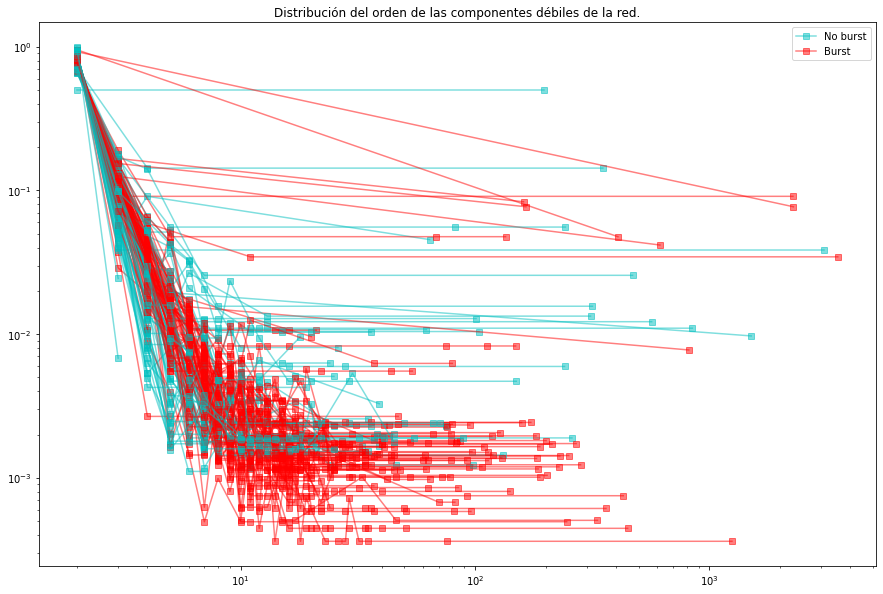

In [8]:
def make_graph_retweets_by_trend(trend):
  """
  Función para los retweets.
  """
  df_rel_retweets = pd.DataFrame([ k.split(',') for k in dic_retweets_user[trend]]
                                 , columns = ['time','target','source'])
  df_rel_retweets['time'] = pd.to_datetime(df_rel_retweets['time'],unit='s')
  G_foo = nx.DiGraph()
  G = nx.from_pandas_edgelist(df_rel_retweets, 
                              edge_attr=True,
                              create_using = G_foo)
  return G

fig, ax1 = plt.subplots()
fig.set_size_inches([15,10])
for trend in trends_to_strudy:
  G = make_graph_retweets_by_trend(trend)
  b = B[ B['trend'] == trend]['burst'].to_list()[0]
  foo_list_weak_components = [len(c) for c in sorted(nx.weakly_connected_components(G), key=len, reverse=True)]
  degreeCount = dict(collections.Counter(foo_list_weak_components))

  X = list(degreeCount.keys())
  Y = list(degreeCount.values()) / np.sum(list(degreeCount.values()))

  if b:
    ax1.set_title("Distribución del orden de las componentes débiles de la red.")
    ax1.loglog(X,Y,color='red',marker = 's', alpha = 0.5, label = "Burst")
  else:
    #ax1.set_title("NO Burst trends")
    ax1.loglog(X,Y, color='c',marker = 's', alpha = 0.5, label = "No burst")
plt.legend(['No burst', 'Burst'])
plt.show()

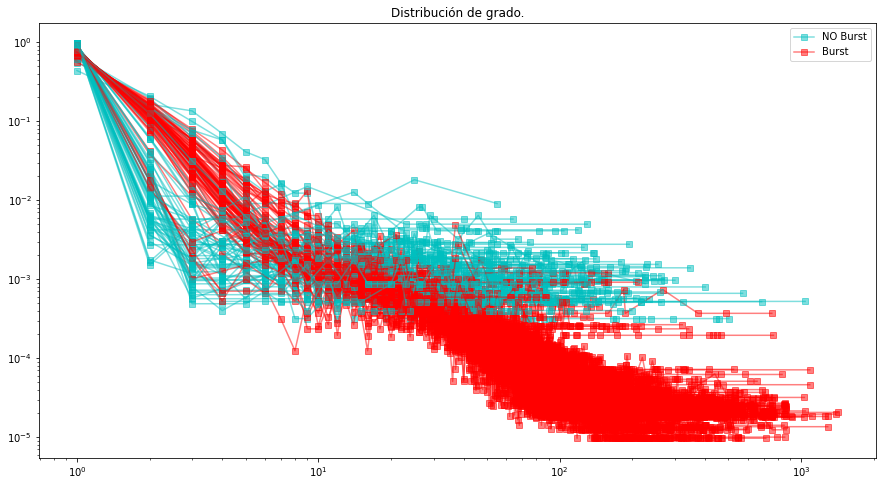

In [8]:
"""
MINI MINI CONJETURA 
QUE TODAS SON DE MUNDO PEQUEÑO
"""
def mean_shortest_path(G):
  try:
    largest_cc = list(max(nx.connected_components(G), key=len))
    Gc = G.subgraph(largest_cc).copy()
    return nx.average_shortest_path_length(Gc)
  except:
    return 0

def mean_clustering_foo(G):
  try:
    largest_cc = list(max(nx.connected_components(G), key=len))
    Gc = G.subgraph(largest_cc).copy()
    return nx.average_shortest_path_length(Gc)
  except:
    return 0

plt.style.use('seaborn-colorblind')
fig, ax1 = plt.subplots()
fig.set_size_inches([15,8])

ax1.set_title("Distribución de grado.")
#data_final = []
for trend in dict_of_max_graph:
  GT = dict_of_max_graph[trend]['GT']
  #C = nx.clustering(GT)
  b = B[ B['trend'] == trend]['burst'].to_list()[0]
  degree_sequence = sorted([d for n, d in GT.degree()], reverse=True)
  degreeCount = dict(collections.Counter(degree_sequence))

  X = list(degreeCount.keys())
  Y = list(degreeCount.values()) / np.sum(list(degreeCount.values()))


  if b:
    ax1.loglog(X,Y, marker = 's', label = "Burst", alpha= 0.5, c= "r")
    #if degreeCount[1] >= 10**4:
    #  ax1.loglog(X,Y, marker = 's', label = "Burst", alpha= 0.5, c= "r")
    #else:
    #  ax1.loglog(X,Y, marker = 's', label = "NO Burst", c='c', alpha = 0.5)
  else:
    #Y = list(degreeCount.values())
    ax1.loglog(X,Y, marker = 's', label = "NO Burst", c='c', alpha = 0.5)
ax1.legend(labels=["NO Burst", "Burst" ], loc = 'best')
plt.show()
  #k = np.mean( list(dict(degreeCount).values()) )
  #n = GT.number_of_nodes()

  #L = B[ B['trend'] == trend]['L'].to_list()[0]
  #C = B[ B['trend'] == trend]['clustering'].to_list()[0]

  #data_trend = [trend,k,n,L,C, b]
  #data_final.append(data_trend)

#df_mini_analisis = pd.DataFrame(data_final, columns=['trend','k','n','L','C','b'])

In [ ]:
data_df_foo_foo = []
for trend in dict_of_max_graph:
  GT = dict_of_max_graph[trend]['GT']
  #C = nx.clustering(GT)
  b = B[ B['trend'] == trend]['burst'].to_list()[0]
  degree_sequence = sorted([d for n, d in GT.degree()], reverse=True)
  degreeCount = dict(collections.Counter(degree_sequence))

  s = entropy_of_graph(GT)

  data_trend = []
  if b:
    if degreeCount[1] >= 10**4:
      #SON DE TIPO BURST
      ax1.loglog(X,Y, marker = 's', label = "Burst", alpha= 0.5, c= "r")
      data_trend.append(trend)
      data_trend.append(s)
      data_trend.append(1)
    else:
      #SON DE TIPO NOOOO BURST
      ax1.loglog(X,Y, marker = 's', label = "NO Burst", c='c', alpha = 0.5)
      data_trend.append(trend)
      data_trend.append(s)
      data_trend.append(0)
  else:
    #SON DE TIPO NOOOO BURST
    ax1.loglog(X,Y, marker = 's', label = "NO Burst", c='c', alpha = 0.5)
    data_trend.append(trend)
    data_trend.append(s)
    data_trend.append(0)
  data_df_foo_foo.append(data_trend)

df_other_foo = pd.DataFrame(data= data_df_foo_foo, columns = ['trend', 's','b'])

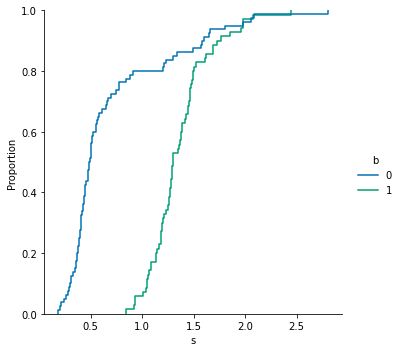

In [ ]:
sn.displot(data = df_other_foo, x = 's', hue='b', kind="ecdf")

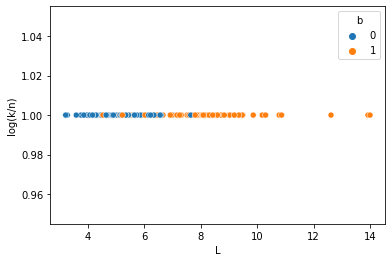

In [ ]:
#df_mini_analisis['k/n'] = df_mini_analisis['k'] / df_mini_analisis['n']
#df_mini_analisis['log(k/n)'] = np.log(df_mini_analisis['n']) / np.log(df_mini_analisis['n'])

sn.scatterplot(x= 'L', y = 'log(k/n)', hue= 'b', data=df_mini_analisis)
plt.show()

## Sobre los cuatro motifs y lo otro

In [9]:
G_friends = nx.from_pandas_edgelist(df_mutual_follow)

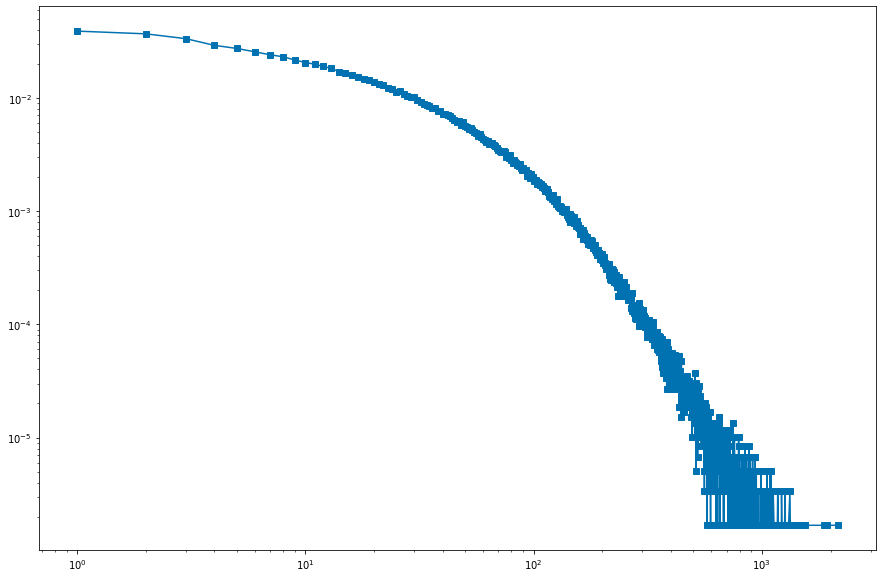

In [18]:
degree_sequence = sorted([d for n, d in G_friends.degree()], reverse=True)
degreeCount = dict(collections.Counter(degree_sequence))

X = list(degreeCount.keys())
Y = list(degreeCount.values()) / np.sum(list(degreeCount.values()))

fig, ax = plt.subplots()

fig.set_size_inches([15,10])

ax.loglog(X,Y, marker='s')

plt.show()

In [79]:
def get_df_frac_motifs(trend):
  #GENERAMOS LOS DATAFRAMES
 
  #TWEETS
  df_rel_tweets = pd.DataFrame([ k.split(',') for k in dic_tweets_user[trend]]
                   , columns = ['time','userid'])
  df_rel_tweets['time'] = pd.to_datetime(df_rel_tweets['time'],unit='s')
 
  df_rel_tweets['day'] = df_rel_tweets['time'].apply(giveday)
  df_rel_tweets['hour'] = df_rel_tweets['time'].apply(givehour)
  
  #RETWEETS
  df_rel_retweets = pd.DataFrame([ k.split(',') for k in dic_retweets_user[trend]]
                   , columns = ['time','target','source'])
  df_rel_retweets['time'] = pd.to_datetime(df_rel_retweets['time'],unit='s')
 
  df_rel_retweets['day'] = df_rel_retweets['time'].apply(giveday)
  df_rel_retweets['hour'] = df_rel_retweets['time'].apply(givehour)
 
  #MENTIONS
  df_rel_mentions = pd.DataFrame([ k.split(',') for k in dic_mentions_user[trend]]
                   , columns = ['time','source','target'])
  df_rel_mentions['time'] = pd.to_datetime(df_rel_mentions['time'],unit='s')
 
  df_rel_mentions['day'] = df_rel_mentions['time'].apply(giveday)
  df_rel_mentions['hour'] = df_rel_mentions['time'].apply(givehour)
 
  
  #VAMOS A SACAR LOS DÍAS Y HORAS DE OPERACIÓN
  set_days_to_tweets = set(pd.unique(df_rel_tweets['day']).tolist())
  set_days_to_retweets = set(pd.unique(df_rel_retweets['day']).tolist())
  set_days_to_mentions = set(pd.unique(df_rel_mentions['day']).tolist())
  study_days = list( set_days_to_tweets | set_days_to_retweets | set_days_to_mentions)


  final_dict = {}

  all_data = []
  for day in study_days:
    for hour in range(0,24):

      info_at_time = []
      info_at_time.append(day)
      info_at_time.append(hour)

      #-----------------------------PARA TWEETS
      tweets_for_day = df_rel_tweets[df_rel_tweets['day'] == day]
      tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
      best_sample = pd.unique(tweets_for_hour['userid'])
      edge_tweets_for_hour = df_mutual_follow[df_mutual_follow['source'].isin(best_sample)]

      G_tweets = nx.Graph()
      nx.from_pandas_edgelist(df = edge_tweets_for_hour,
                        source = 'source',
                        target = 'target',
                        create_using=G_tweets)
      
      Ntwets = tweets_for_hour.shape[0]
      S = entropy_of_graph(G_tweets)

      info_at_time.append(Ntwets)
      info_at_time.append(S)

      #------------------------------PARA RETWEETS
      retweets_for_day = df_rel_retweets[df_rel_retweets['day'] == day]
      edges_retweets_for_hour = retweets_for_day[retweets_for_day['hour'] == hour]

      G_retweets = nx.DiGraph()
      nx.from_pandas_edgelist(df = edges_retweets_for_hour,
                        source = 'source',
                        target = 'target',
                        create_using=G_retweets)
      

      N = len(G_retweets.to_undirected().edges)

      R_M1 = 0
      R_M2 = 0
      R_M3 = 0
      R_M4 = 0

      for s,t in G_retweets.to_undirected().edges:
        are_friends = G_friends.has_edge(s, t)
        are_s_t = G_retweets.has_edge(s,t)
        are_t_s = G_retweets.has_edge(t,s)

        #CASO DE LOS MOTIFS 

        if are_friends:
          #M3
          if are_s_t and are_t_s:
            R_M3 += 1
          #M1
          elif are_s_t:
            R_M1 += 1
          elif are_t_s:
            R_M1 += 1
          else:
            pass
        else:
          #M3
          if are_s_t and are_t_s:
            R_M4 += 1
          #M1
          elif are_s_t:
            R_M2 += 1
          elif are_t_s:
            R_M2 += 1
          else:
            pass
      if N == 0:
        N = 1
      info_at_time.append(R_M1 / N)
      info_at_time.append(R_M2 / N)
      info_at_time.append(R_M3 / N)
      info_at_time.append(R_M4 / N)
      info_at_time.append( (N - (R_M1 + R_M2 + R_M3 + R_M4) ) / N)

      #------------------------------PARA MENTIONS
      mentions_for_day = df_rel_mentions[df_rel_mentions['day'] == day]
      edges_mentions_for_hour = mentions_for_day[mentions_for_day['hour'] == hour]

      G_mentions = nx.DiGraph()
      nx.from_pandas_edgelist(df = edges_mentions_for_hour,
                          source = 'source',
                          target = 'target',
                          create_using=G_mentions)
      
      M_M1 = 0
      M_M2 = 0
      M_M3 = 0
      M_M4 = 0

      N = len(G_mentions.to_undirected().edges)


      for s,t in G_mentions.to_undirected().edges:
        are_friends = G_friends.has_edge(s, t)
        are_s_t = G_mentions.has_edge(s,t)
        are_t_s = G_mentions.has_edge(t,s)

        #CASO DE LOS MOTIFS 

        if are_friends:
          #M3
          if are_s_t and are_t_s:
            M_M3 += 1
          #M1
          elif are_s_t:
            M_M1 += 1
          elif are_t_s:
            M_M1 += 1
          else:
            pass
        else:
          #M3
          if are_s_t and are_t_s:
            M_M4 += 1
          #M1
          elif are_s_t:
            M_M2 += 1
          elif are_t_s:
            M_M2 += 1
          else:
            pass
      if N == 0:
        N = 1
      info_at_time.append(M_M1 / N)
      info_at_time.append(M_M2 / N)
      info_at_time.append(M_M3 / N)
      info_at_time.append(M_M4 / N)
      info_at_time.append((N - (M_M1 + M_M2 + M_M3 + M_M4) )/ N)

      all_data.append(info_at_time)


  return pd.DataFrame(data= all_data, columns= ['day','hour','Ntweets', 's',
                                                'R_M1','R_M2','R_M3','R_M4','R_M5',
                                                'M_M1','M_M2','M_M3','M_M4','M_M5'])

trend = "wewontworkoutif"
df_superfoo = get_df_frac_motifs(trend)

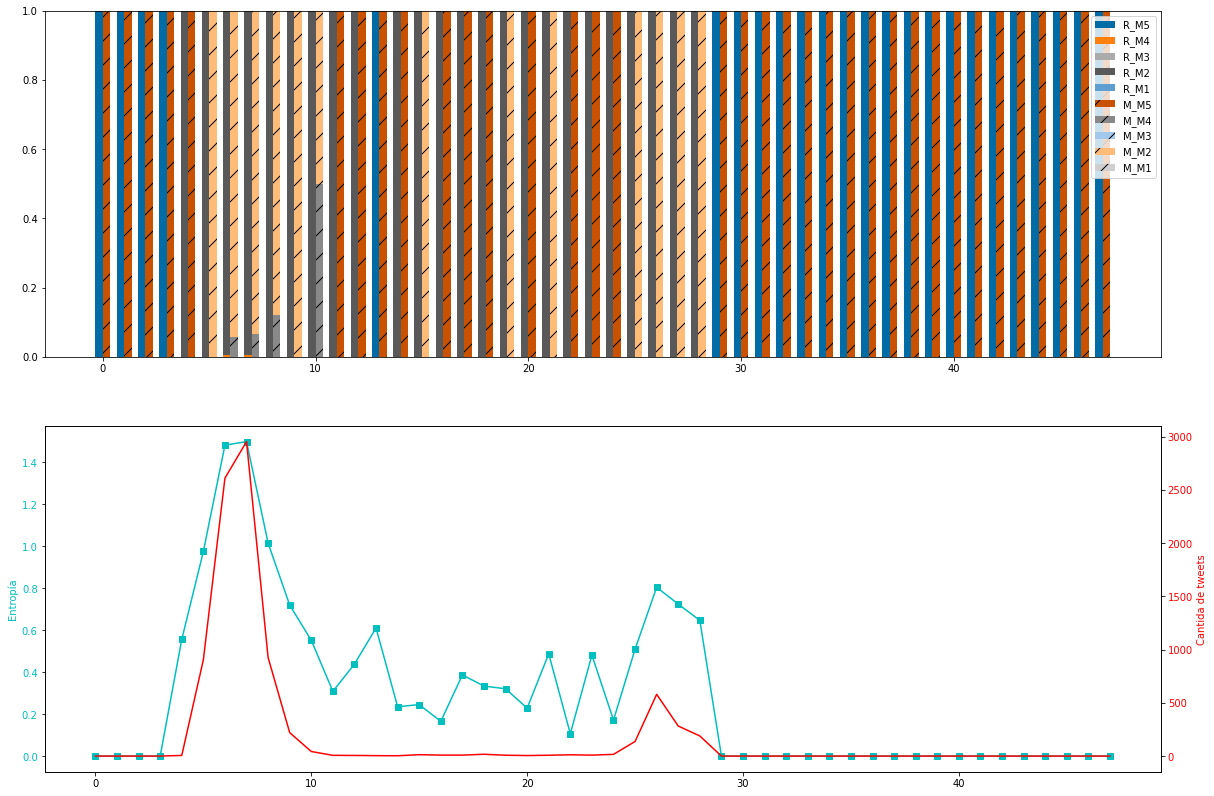

In [98]:
foo_df = df_superfoo
plt.style.use('tableau-colorblind10')
fig, [ax1,ax2] = plt.subplots(2,1)
fig.set_size_inches([20,14])

width = 0.35
x = np.array(foo_df.index)

R_M1 = foo_df['R_M1']
R_M2 = foo_df['R_M2']
R_M3 = foo_df['R_M3']
R_M4 = foo_df['R_M4']
R_M5 = foo_df['R_M5']

M_M1 = foo_df['M_M1']
M_M2 = foo_df['M_M2']
M_M3 = foo_df['M_M3']
M_M4 = foo_df['M_M4']
M_M5 = foo_df['M_M5']

s = foo_df['s']
ntweets = foo_df['Ntweets']

ax1.bar(x = x - 1/2 * width, height = R_M5, width= width, label = 'R_M5')
ax1.bar(x = x - 1/2 * width, height = R_M4, width= width, label = 'R_M4',
            bottom = R_M5)
ax1.bar(x = x - 1/2 * width, height = R_M3, width= width, label = 'R_M3',
            bottom = R_M5 + R_M4)
ax1.bar(x = x - 1/2 * width, height = R_M2, width= width, label = 'R_M2',
            bottom = R_M5 + R_M4 + R_M3)
ax1.bar(x = x - 1/2 * width, height = R_M1, width= width, label = 'R_M1',
            bottom = R_M5 + R_M4 + R_M3 + R_M2)

ax1.bar(x = x + 1/2 * width, height = M_M5, width= width, label = 'M_M5',hatch = '/')
ax1.bar(x = x + 1/2 * width, height = M_M4, width= width, label = 'M_M4',hatch = '/',
            bottom = M_M5)
ax1.bar(x = x + 1/2 * width, height = M_M3, width= width, label = 'M_M3',hatch = '/',
            bottom = M_M5 + M_M4)
ax1.bar(x = x + 1/2 * width, height = M_M2, width= width, label = 'M_M2',hatch = '/',
            bottom = M_M5 + M_M4 + M_M3)
ax1.bar(x = x + 1/2 * width, height = M_M1, width= width, label = 'M_M1',hatch = '/',
            bottom = M_M5 + M_M4 + M_M3 + M_M2)

ax1.legend()


ax2.plot(x,s, marker = 's', color = 'c')
ax2.set_ylabel("Entropía",color = 'c')
ax2.tick_params(axis='y', labelcolor='c')

ax3 = ax2.twinx()
ax3.plot(x,ntweets, color = 'red')
ax3.set_ylabel("Cantida de tweets",color = 'red')
ax3.tick_params(axis='y', labelcolor='red')

plt.show()

In [ ]:
data_in_list = []
for trend in trends_to_strudy:
  dict_aux = dict_of_max_graph[trend]

  G_T = dict_aux['GT']
  G_R = dict_aux['GR']
  G_M = dict_aux['GM']

  print(trend)
  data_in_list.append([trend,nx.density(G_T),strong_edge(G_T)])

df = pd.DataFrame(data= data_in_list, columns= ['trend', 'density','SE' ])

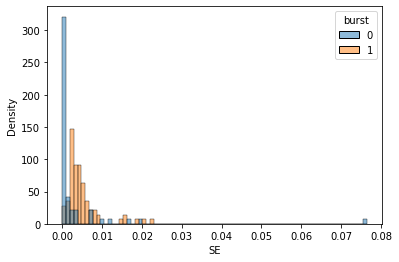

In [ ]:
ndf = B.copy()
ndf['density'] = df['density']
ndf['SE'] = df['SE']
sn.histplot(data=ndf, x="SE", hue="burst",stat="density",bins=80)
plt.show()


#plt.scatter(ndf['SE'],np.log(ndf['clustering']))
#plt.show()

In [ ]:
list_final = []
for trend in trends_to_strudy:
  dict_aux = dict_of_max_graph[trend]

  G_T = dict_aux['GT']
  r = nx.algorithms.assortativity.degree_pearson_correlation_coefficient(G_T)
  list_final.append(r)
ndf['rmax'] = np.array(list_final)

KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


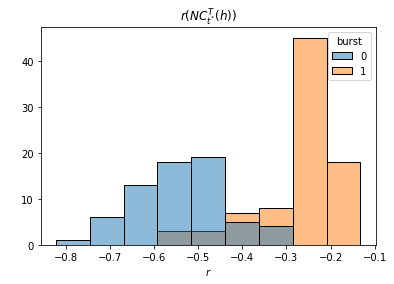

In [ ]:
sn.histplot(data=ndf, x="rmax", hue="burst")
plt.title("$r(NC_{t^{*}}^{T}(h))$")
plt.xlabel("$r$")
plt.ylabel(" ")
plt.savefig("/content/hist_r_max.pdf")

In [ ]:
list_final = []
for trend in trends_to_strudy:
  dict_aux = dict_of_max_graph[trend]

  G_T = dict_aux['GT']
  r = strong_edge(G_T)
  list_final.append(r)
ndf['SEmax'] = np.array(list_final)

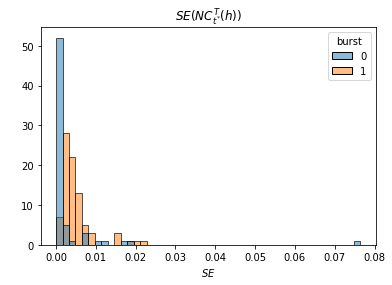

In [ ]:
sn.histplot(data=ndf, x="SEmax", hue="burst")
plt.title("$SE(NC_{t^{*}}^{T}(h))$")
plt.xlabel("$SE$")
plt.ylabel(" ")
plt.savefig("/content/hist_SE_max.pdf")

In [ ]:
ndf.sort_values(by='diam_ment',ascending=False)

,trend,ntweets,nretweets,nmentions,k,L,clustering,betweenness,entropy,diam_rt,v_rt,diam_ment,v_ment,r,burst,density,SE,SEmax,rmax
53,10peopleontwitteriwanttomeet,23.371795,4.092949,8.176282,2.233333,7.875732,0.001589,0.010089,0.112482,2,13,19,47,-0.260173,1,0.000076,0.007973,0.007973,-0.230264
62,twitterpeopleilove,26.136905,5.342262,9.306548,2.345382,9.469040,0.000674,0.003577,0.090769,7,10,18,12,-0.197152,1,0.000061,0.009082,0.009082,-0.209331
132,hotpeopleifollow,15.786111,3.027778,4.686111,2.250000,7.303902,0.001171,0.008889,0.102799,3,10,9,35,-0.248467,1,0.000097,0.004793,0.004793,-0.244379
128,icantlivewithout,7.987500,1.558333,0.534722,2.200000,7.800524,0.000592,0.010569,0.082205,6,36,7,13,-0.237642,1,0.000066,0.002567,0.002567,-0.276053
134,nameyourfavoriterapper,16.833333,2.704545,1.765152,2.068771,6.916986,0.000209,0.008389,0.082716,4,11,6,7,-0.216641,1,0.000065,0.001902,0.001902,-0.364725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,truestory,5.814951,0.634804,0.712010,2.219355,3.751120,0.001517,0.008707,0.335651,2,9,2,4,-0.255396,0,0.003479,0.000000,0.000000,-0.469727
60,scorpios,8.537990,0.229167,0.093137,2.533333,13.926180,0.001009,0.016145,0.237844,2,4,2,7,-0.253956,1,0.000498,0.000439,0.000439,-0.421113
56,respect,6.822304,0.949755,1.367647,2.129032,4.747676,0.001102,0.008315,0.275105,3,6,2,6,-0.280777,0,0.001330,0.000714,0.000714,-0.668367
54,arentyoutiredof,15.083333,3.711538,0.314103,2.496241,7.689039,0.001172,0.009149,0.117300,4,38,2,4,-0.243751,1,0.000067,0.002808,0.002808,-0.273077


#SOBRE LAS COMUNIDADES


In [ ]:
trend = "10peopleontwitteriwanttomeet"
dict_aux = dict_of_max_graph[trend]

name = "{}_{}".format("twi",trend)
path = "/content/data_comunity/{}.gexf".format(name)
G_M = dict_aux['GT']
largest_cc = list(max(nx.connected_components(G_M), key=len))
Gc = G_M.subgraph(largest_cc).copy()
nx.write_gexf(Gc, path)

name = "{}_{}".format("ret",trend)
path = "/content/data_comunity/{}.gexf".format(name)
G_R = dict_aux['GR']
nx.write_gexf(G_R, path)

name = "{}_{}".format("men",trend)
path = "/content/data_comunity/{}.gexf".format(name)
G_M = dict_aux['GM']
nx.write_gexf(G_M, path)

  

In [ ]:
finaldf = "/content/drive/My Drive/FC_Materias/FC_Proyecto_1/finaldf.csv"

df = pd.read_csv(finaldf)
new_df = df[ df['burst'] == 1]

final_list = list(new_df['trend'])

for trend in final_list:
  print(trend)
  

first20songsonshuffle
10thingsihate
wewontworkoutif
teamheat
ididnttextyouback
tweetyourheight
lolatgirlswho
mythoughtsduringschool
thatirritatesme
imhappywhen
thingsthatguyslike
itstimeforyoutorealize
top100lies
mybiggestfearis
yougetmajorpointsif
icantstandwhen
ifweweretogetherrightnow
nomanshouldever
thingsigottateachmyson
youvedoneittoo
nationalbestfriendday
itsfunnyhow
pbbteens4
thehairoscope
moviesthatnevergetold
twitterafterdark
waystomakemehappy
youknowwhatannoysme
10peopleontwitteriwanttomeet
arentyoutiredof
thingspeopledothatgetonmynerves
scorpios
twitterpeopleilove
butyouathug
itscrazyhow
iwonderif
thingsilovetosee
iknowthisonegirl
fourwordsyoudontwanttohear
wheniwaslittle
favtvshow
f1
iwantsomebody
geminisignz
stayawayfrommeif
whatgetsmemad
wordsyouwillneverhearmesay
youknowwhatsannoying
favmusic
incollege
thatsthetruth
swaggie
4wordsyoudontwanttohear
somefactsyoushouldknow
amitheonlyonethat
mythoughtsduringsex
youdontbelongontwitterif
whatmakesmesmile
libras
thingsblackpeo